## Unidad 4: Hipótesis y Correlación
### Actividad 08

## Ejercicio 1: Evaluación de hipótesis

A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

1. 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era administrar una encuesta para medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:
    - El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
    - Asumiendo que la hipótesis nula es que ambos porcentajes no son estadísticamente diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    - Con un valor de prueba $p=11.83$ y un puntaje de corte de 2.58, ¿qué se debe concluir?

- Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?

In [1]:
from scipy import stats
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

1. 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era administrar una encuesta para medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:
    - El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
    - Asumiendo que la hipótesis nula es que ambos porcentajes no son estadísticamente diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    - Con un valor de prueba $z=11.83$ y un puntaje de corte de 2.58, ¿qué se debe concluir?

### Para un intervalo de confianza de un 99%, se falla en rechazar la Hipótesis Nula

- Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?

### La muestra no es lo suficientemente grande para inferir un distribución asintóticamente normal

## Ejercicio 2: Importe la base de datos utilizada la sesión anterior. 
* Agrege una serie de variables binarias por cada continente de la variable `region`.
    - _tip_: Utilice `np.where` para ello.

* De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    * Apellidos desde la A hasta la N: Enfocarse en las variables `chldmort`, `adfert` y `life`.
    * Apellidos desde la N hasta la Z: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [2]:
df = pd.read_csv('nations.csv', encoding='latin1')
df = df.drop(columns="Unnamed: 0")

In [3]:
for n in df['region'].unique():
    df[n] = np.where(df['region'] == n, 1,0)

## Ejercicio 3: Implemente una función de prueba de hipótesis a mano

* La función debe ingresar los siguientes argumentos:
    - `df`: La tabla de datos.
    - `variable`: La variable a analizar.
    - `binarize`: El indicador binario a utilizar.
* _tips:_ 
    - Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con `dropna()`.
    - Implemente `ttest_ind` de `scipy.stats` y guarde el valor `t` y `pval`.
    - Reporte las medias para cada grupo (0 y 1).
    - Reporte la diferencia de entre las medias.
    - Reporte los valores t y p

In [4]:
def hipotesis_a_mano(dataframe, variable, binarize):
    
    """
    Función que retorna la prueba de hipótesis, indicando el valor t, pvalue, media y comparación de medias entre la binarización de la variable a ingresar
    """

    bin_1 = dataframe.query(binarize + '== 1')[variable].dropna()
    bin_0 = dataframe.query(binarize + '== 0')[variable].dropna()
    
    print ("Valor t: {}".format((stats.ttest_ind(bin_1,bin_0))[0]))
    print ("Valor p: {}".format((stats.ttest_ind(bin_1,bin_0))[1]))
    print ("Media de {} para {}: {}".format(variable, binarize, np.mean(bin_1)))
    print ("Media de {} distintos a {}: {}".format(variable, binarize, np.mean(bin_0)))
    print ("Diferencia entre medias: {}".format(np.abs(np.mean(bin_0)-np.mean(bin_1))))

In [5]:
def hist_2_samples(dataframe, variable, binarize):
    
    """
    Función que genera dos histogramas a partir de una variable binarizada
    """
    
    bin_1 = dataframe.query(binarize + '== 1')[variable].dropna()
    bin_0 = dataframe.query(binarize + '== 0')[variable].dropna()
    
    plt.hist(bin_1, alpha=0.9, color='tomato', label= variable+' para '+ binarize)
    plt.hist(bin_0, alpha=0.6, color='dodgerblue',label= variable+' para RoW')
    plt.title("Comparativa de {} para \n {} y RoW".format(variable, binarize))
    plt.ylabel(variable)
    plt.legend()

## Ejercicio 4: Implemente una función que grafique los histogramas para ambas muestras.

* Genere una función que devuelva un gráfico donde visualice los dos histogramas de la variable acorde a cada subgrupo, respectivamente.
* _tips_: Refactorize la función incluyendo el método `hist` de `matplotlib.pyplot`. Incluya los argumentos `alpha` y `label`.


In [6]:
for region in df['region'].unique():
    hipotesis_a_mano(df,'chldmort', region)
    print ("")

Valor t: 14.17367667788517
Valor p: 1.244572684496239e-31
Media de chldmort para Africa: 109.75
Media de chldmort distintos a Africa: 24.74822695035461
Diferencia entre medias: 85.0017730496454

Valor t: -3.08561941878294
Valor p: 0.00233300081092071
Media de chldmort para Americas: 23.264285714285716
Media de chldmort distintos a Americas: 53.052215189873415
Diferencia entre medias: 29.7879294755877

Valor t: -1.602738386676471
Valor p: 0.1106448646711535
Media de chldmort para Asia: 37.104166666666664
Media de chldmort distintos a Asia: 51.141379310344824
Diferencia entre medias: 14.03721264367816

Valor t: -6.262400472976766
Valor p: 2.4506589890929246e-09
Media de chldmort para Europe: 7.046511627906977
Media de chldmort distintos a Europe: 59.29
Diferencia entre medias: 52.243488372093026

Valor t: -0.6277779742677246
Valor p: 0.5308992371716935
Media de chldmort para Oceania: 39.416666666666664
Media de chldmort distintos a Oceania: 48.34410112359551
Diferencia entre medias: 8.92

In [7]:
for region in df['region'].unique():
    hipotesis_a_mano(df,'adfert', region)
    print ("")

Valor t: 9.444409431356496
Valor p: 1.2481674170069097e-17
Media de adfert para Africa: 92.72115342892133
Media de adfert distintos a Africa: 36.83450711361119
Diferencia entre medias: 55.88664631531014

Valor t: 1.7662790555775358
Valor p: 0.07893816171889229
Media de adfert para Americas: 63.659999847412095
Media de adfert distintos a Americas: 49.20691819985708
Diferencia entre medias: 14.453081647555017

Valor t: -3.386269877966909
Valor p: 0.0008592686089688165
Media de adfert para Asia: 33.86530622170896
Media de adfert distintos a Asia: 57.87999988671007
Diferencia entre medias: 24.014693665001104

Valor t: -6.797972597840039
Valor p: 1.3040875269879142e-10
Media de adfert para Europe: 15.53720931396928
Media de adfert distintos a Europe: 62.14503303268887
Diferencia entre medias: 46.607823718719594

Valor t: -0.6231321887004015
Valor p: 0.5339371393742243
Media de adfert para Oceania: 44.99333400726322
Media de adfert distintos a Oceania: 52.38603339847906
Diferencia entre medi

In [8]:
for region in df['region'].unique():
    hipotesis_a_mano(df,'life', region)
    print ("")

Valor t: -15.174602759471485
Valor p: 1.0713988391633837e-34
Media de life para Africa: 56.49038454202504
Media de life distintos a Africa: 73.21114999475614
Diferencia entre medias: 16.7207654527311

Valor t: 3.138414667252044
Valor p: 0.0019666060685098454
Media de life para Americas: 73.45142800467355
Media de life distintos a Americas: 67.68983217155409
Diferencia entre medias: 5.761595833119458

Valor t: 1.7346722179790488
Valor p: 0.08440370105334277
Media de life para Asia: 70.87244882388991
Media de life distintos a Asia: 68.0050572625522
Diferencia entre medias: 2.867391561337712

Valor t: 6.735355531733241
Valor p: 1.8491610377704372e-10
Media de life para Europe: 76.94573619753815
Media de life distintos a Europe: 66.38951416520882
Diferencia entre medias: 10.55622203232933

Valor t: 0.342110739720379
Valor p: 0.7326417413000359
Media de life para Oceania: 69.58444468180339
Media de life distintos a Oceania: 68.65763477772973
Diferencia entre medias: 0.9268099040736644



## Ejercicio 5: Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

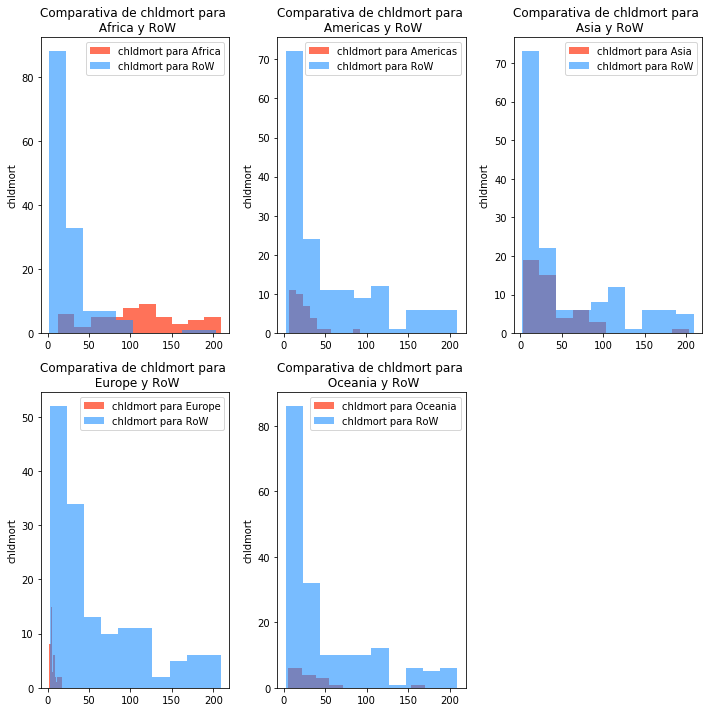

In [9]:
plt.figure(figsize=(10,10))
for index, value in enumerate (df['region'].unique()):
    plt.subplot(2,3, index+1); hist_2_samples(df,'chldmort', value)
    plt.tight_layout()

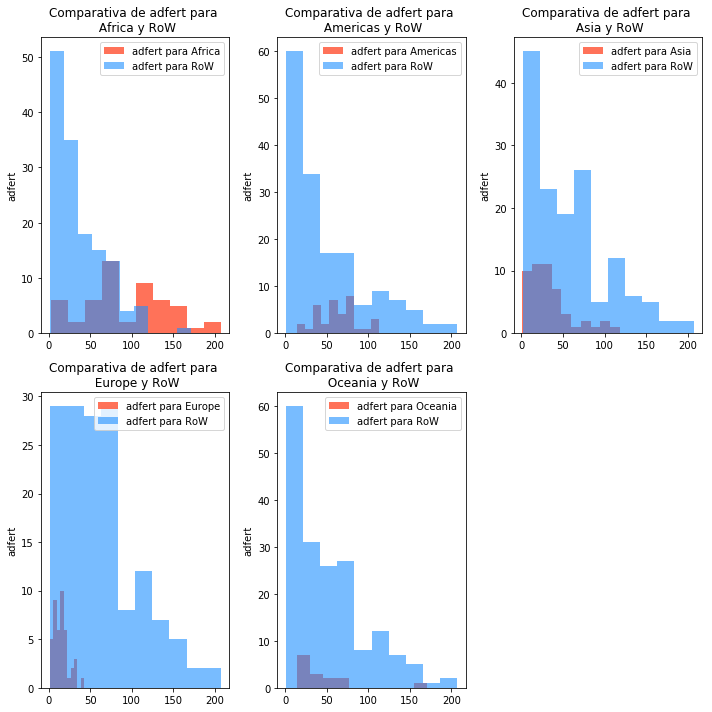

In [10]:
plt.figure(figsize=(10,10))
for index, value in enumerate (df['region'].unique()):
    plt.subplot(2,3, index+1); hist_2_samples(df,'adfert', value)
    plt.tight_layout()

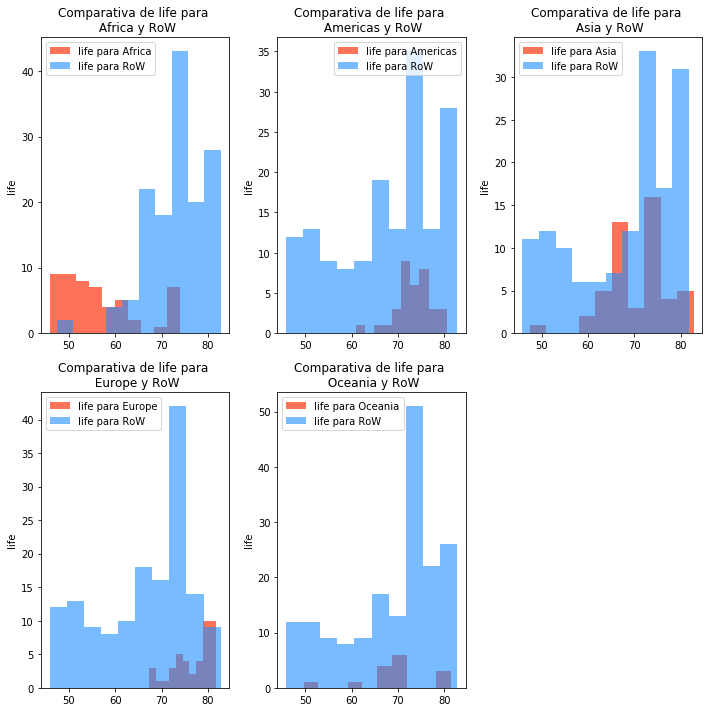

In [11]:
plt.figure(figsize=(10,10))
for index, value in enumerate (df['region'].unique()):
    plt.subplot(2,3, index+1); hist_2_samples(df,'life', value)
    plt.tight_layout()